# Analyse Comparative des algorithmes ML/DL dans une tâche de classification

### Cas d'étude : Prédire le comportement des visiteurs d'un site de l'e-commerce pour estimer le taux de conversion des clients.

#### Importation des librairies nécessaires :

In [466]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import pandas as pd 
from sklearn.model_selection import train_test_split ,GridSearchCV,StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay,classification_report 
from sklearn.metrics import f1_score , roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.naive_bayes import GaussianNB
from sklearn import svm 
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
from sklearn.cluster import AgglomerativeClustering
from sklearn.neural_network import MLPClassifier 
from  scipy.cluster.hierarchy import dendrogram 
from scipy.cluster import hierarchy 
from tensorflow import keras
from sklearn.metrics import rand_score
import plotly.graph_objs as go
import plotly.offline as pyo

Importation de données

In [450]:
df = pd.read_csv('input_training_data.csv')
df.rename(columns={'Revenue': 'HasBought'},inplace=True)

In [451]:
df.shape

(8622, 19)

In [5]:
nbconvert --to webpdf --allow-chromium-download your-notebook-file.ipynb

SyntaxError: invalid syntax (4183832896.py, line 1)

In [452]:
df.columns

Index(['ID', 'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'HasBought'],
      dtype='object')

## Data Cleaning 

In [300]:
df.isna().sum()

ID                         0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
HasBought                  0
dtype: int64

On élimine les valeurs depliqués

In [6]:
print('no of duplicates: ',len(df[df.duplicated()]))
df.drop_duplicates(inplace=True)

no of duplicates:  0


In [7]:
df.describe()

ID  Administrative  Administrative_Duration  Informational  \
count   8622.000000     8622.000000              8622.000000    8622.000000   
mean    8015.889121        2.343192                83.405240       0.490373   
std     2491.319819        3.315094               182.985925       1.258803   
min     3701.000000        0.000000                -1.000000       0.000000   
25%     5859.250000        0.000000                 0.000000       0.000000   
50%     8016.500000        1.000000                 9.000000       0.000000   
75%    10172.750000        4.000000                95.575000       0.000000   
max    12330.000000       26.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             8622.000000     8622.000000              8622.000000   
mean                33.159578       31.872419              1192.184366   
std                138.432097       44.605549              1944.264408   
min                 -1.000000        0.000000                -1.000000   
25%                  0.000000        7.000000               192.462500   
50%                  0.000000       18.000000               606.283333   
75%                  0.000000       37.000000              1450.841355   
max               2549.375000      705.000000             63973.522230   

       BounceRates    ExitRates   PageValues   SpecialDay  OperatingSystems  \
count  8622.000000  8622.000000  8622.000000  8622.000000       8622.000000   
mean      0.021920     0.042457     5.704339     0.061795          2.124101   
std       0.047651     0.047784    17.776590     0.199441          0.914461   
min       0.000000     0.000000     0.000000     0.000000          1.000000   
25%       0.000000     0.014286     0.000000     0.000000          2.000000   
50%       0.003279     0.025000     0.000000     0.000000          2.000000   
75%       0.017497     0.050000     0.000000     0.000000          3.000000   
max       0.200000     0.200000   360.953384     1.000000          8.000000   

           Browser       Region  TrafficType      Weekend    HasBought  
count  8622.000000  8622.000000  8622.000000  8622.000000  8622.000000  
mean      2.349803     3.154605     4.117606     0.233820     0.154836  
std       1.719077     2.409020     4.070923     0.423284     0.361770  
min       1.000000     1.000000     1.000000     0.000000     0.000000  
25%       2.000000     1.000000     2.000000     0.000000     0.000000  
50%       2.000000     3.000000     2.000000     0.000000     0.000000  
75%       2.000000     4.000000     4.000000     0.000000     0.000000  
max      13.000000     9.000000    20.000000     1.000000     1.000000

## DATA VISUALISATION AND ANALYSIS¶

### Analyse des variable catégoriques 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8622 entries, 0 to 8621
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       8622 non-null   int64  
 1   Administrative           8622 non-null   int64  
 2   Administrative_Duration  8622 non-null   float64
 3   Informational            8622 non-null   int64  
 4   Informational_Duration   8622 non-null   float64
 5   ProductRelated           8622 non-null   int64  
 6   ProductRelated_Duration  8622 non-null   float64
 7   BounceRates              8622 non-null   float64
 8   ExitRates                8622 non-null   float64
 9   PageValues               8622 non-null   float64
 10  SpecialDay               8622 non-null   float64
 11  Month                    8622 non-null   object 
 12  OperatingSystems         8622 non-null   int64  
 13  Browser                  8622 non-null   int64  
 14  Region                  

In [9]:
df.groupby('HasBought').mean()
# le moyen des deux classes (0: visiteur non client , 1: vistieur Client)

ID  Administrative  Administrative_Duration  \
HasBought                                                         
0          7996.480170        2.160560                77.434044   
1          8121.831461        3.340075               115.998579   

           Informational  Informational_Duration  ProductRelated  \
HasBought                                                          
0               0.445862               29.160858       28.950322   
1               0.733333               54.986298       47.822472   

           ProductRelated_Duration  BounceRates  ExitRates  PageValues  \
HasBought                                                                
0                      1074.579098     0.025058   0.046707    1.916449   
1                      1834.124137     0.004788   0.019256   26.380256   

           SpecialDay  OperatingSystems   Browser    Region  TrafficType  \
HasBought                                                                  
0            0.068533          2.132016  2.327981  3.164677     4.126252   
1            0.025019          2.080899  2.468914  3.099625     4.070412   

            Weekend  
HasBought            
0          0.228352  
1          0.263670

-   Les Données déséquilibrées , prédominance d'une classe par rapport à l'autre

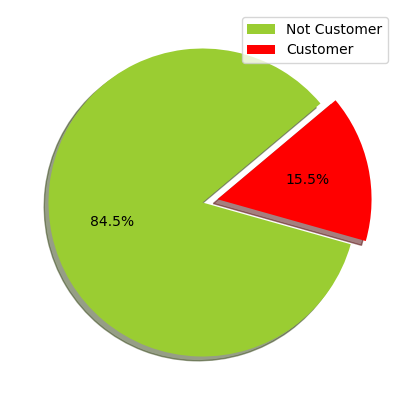

In [10]:
plt.figure(figsize=(6,5))
plt.pie(df.HasBought.value_counts(),explode=[0,0.1],colors=['yellowgreen','red'],startangle=40,autopct='%1.1f%%',shadow=True)
plt.legend(labels=['Not Customer','Customer'],loc='upper right')
plt.show()

On remarque donc que la classe 0 (aucune transaction n'a été effectué) est la classe prédominante

<p style="color:red;text-align :center";> Effet du nombre des  pages ProductRelated  sur la conversion en customer </p>  

<AxesSubplot:xlabel='ProductRelated', ylabel='Count'>

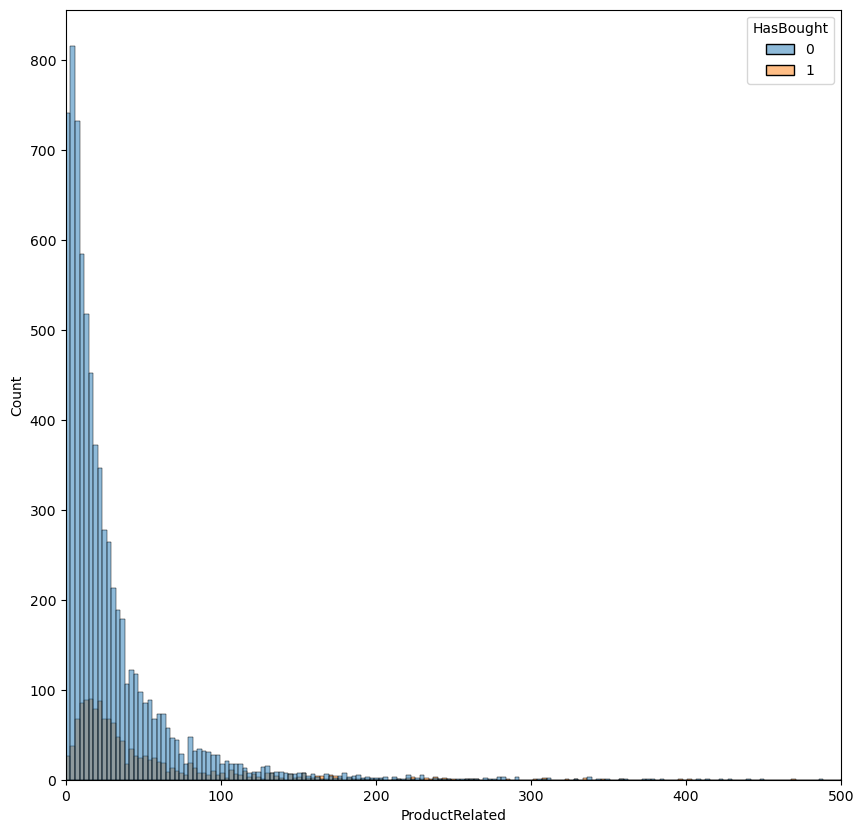

In [11]:
plt.figure(figsize=(10,10))
plt.xlim(0,500)
sns.histplot(x='ProductRelated',data=df,hue ='HasBought',color='purple')

<p style="color:red;text-align :center";> Temps passer par un visteur_non_client et un visiteur_client</p>  

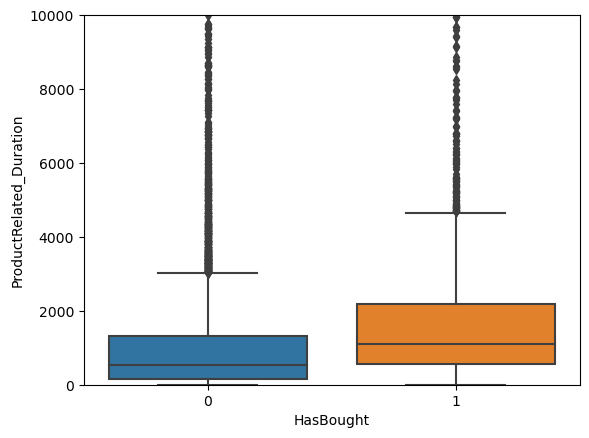

In [12]:
plt.ylim(0,10000)
sns.boxplot( x='HasBought' , y='ProductRelated_Duration',data=df);

On remarque que globalement les personnes converties en clients passent assez de temps dans les pages relatives aux produits que ceux qui n'ont pas achetés de produits.

<AxesSubplot:xlabel='BounceRates', ylabel='Count'>

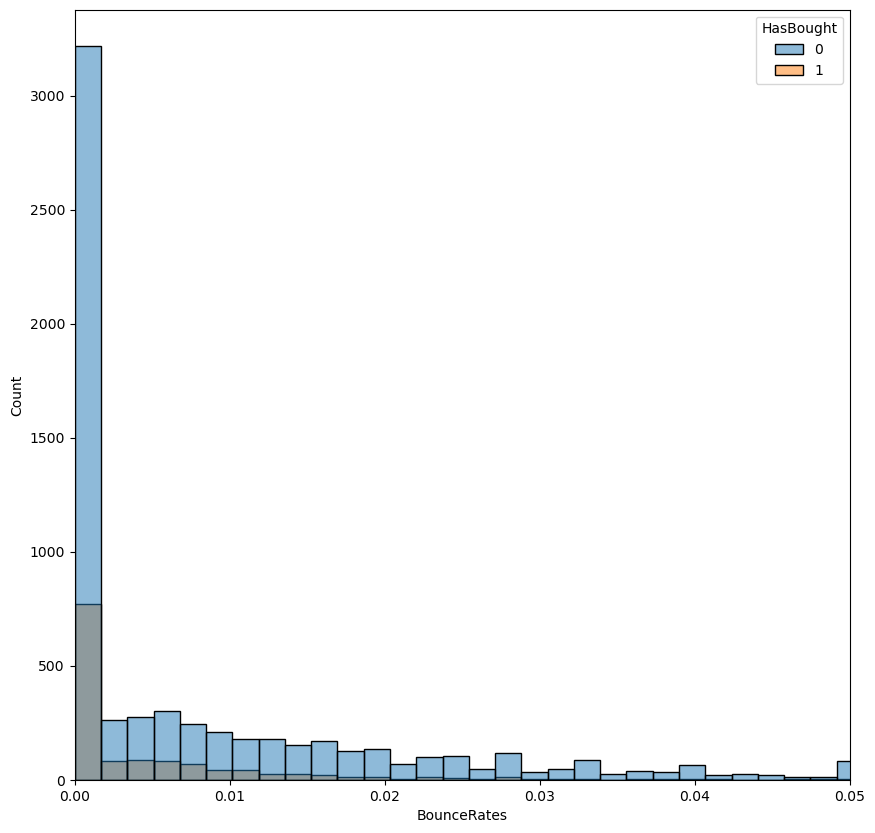

In [13]:
plt.figure(figsize=(10,10))
plt.xlim(0,0.05)
sns.histplot(x='BounceRates',data=df,hue ='HasBought',color='brown')

Un BounceRate faible conduit à une conversion fort probable (une corrélation négative) , un bounceRate > 0.01 conduit à un taux de conversion inférieur à la moyenne.

<h2 style="color:red;text-align :center";> Relation entre la métrique ExitRates et le taux de conversion de visiteur à client. </h2>  



<AxesSubplot:xlabel='ExitRates', ylabel='Count'>

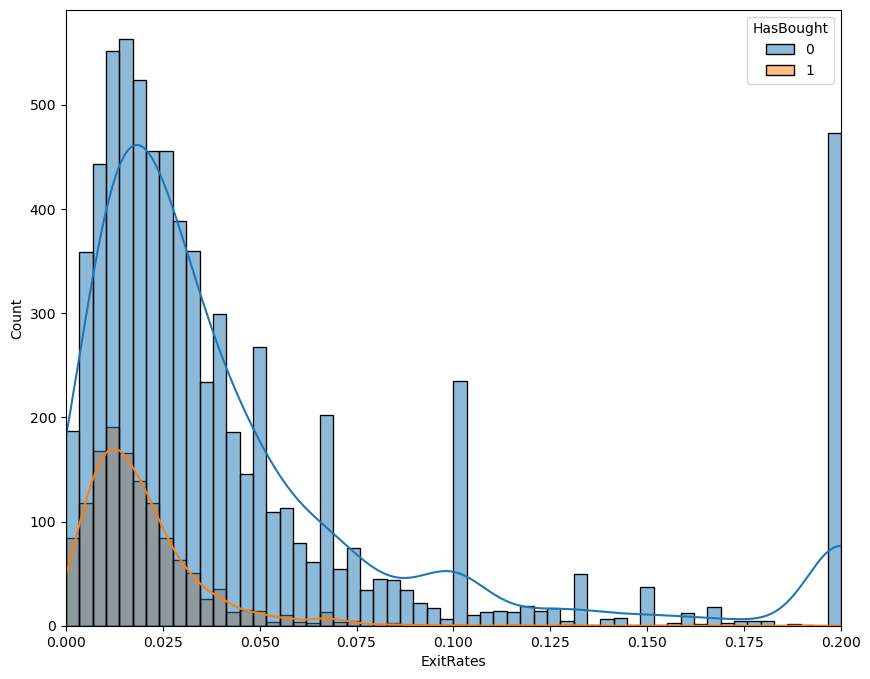

In [14]:
plt.figure(figsize=(10,8))
plt.xlim(0,0.2)
sns.histplot(x=df['ExitRates'],hue=df['HasBought'],color='red',kde=True)

Une forte corrélation négative entre le ExitRate moyen des pages visitées et la conversion du visiteur, généralement c'est entre 0.005 et 0.02

<AxesSubplot:xlabel='Month'>

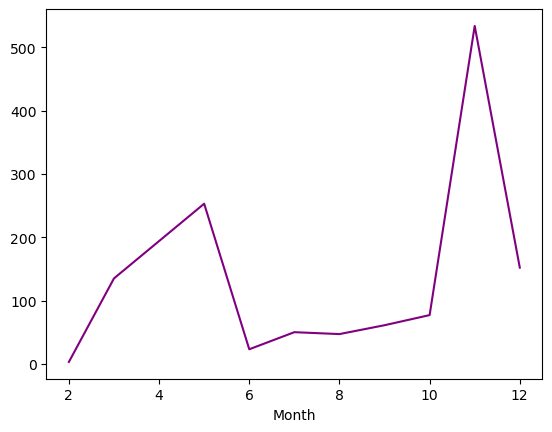

In [311]:
months={
   'Feb' : 2 ,'Mar' : 3 ,'May' : 5 ,'June'  :6 ,'Jul' : 7 ,'Aug' :8 ,'Sep':9,'Oct' : 10 ,'Nov' : 11 ,'Dec' : 12 
}

df['Month']=df.Month.apply(lambda x: months[x])
df.groupby('Month')['HasBought'].sum().plot(kind='line',color='purple') 

Business a fait un énorme profit en novembre.

In [16]:
df[df['HasBought'] ==1].shape[0]/df[df['HasBought'] ==0].shape[0]*100

18.320296418279128

#### Effet de la métrique PageValues sur le taux de conversion 

In [17]:
#plt.figure(figsize=(10,8))  
import plotly.offline as pyo
import plotly.graph_objs as go

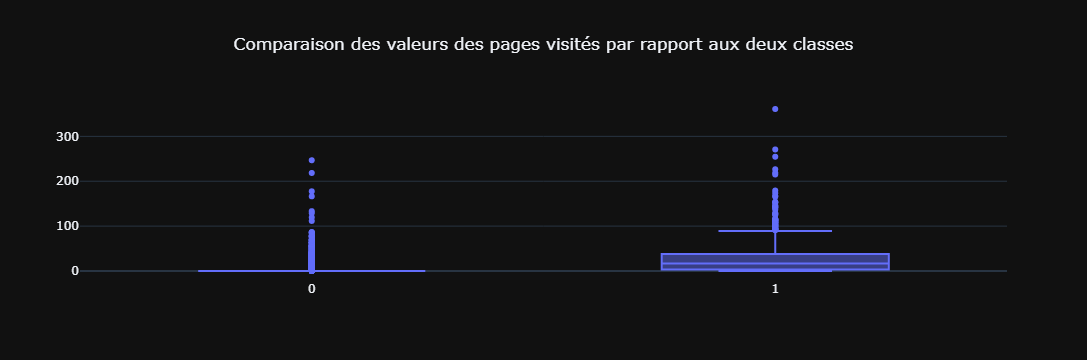

In [18]:

data = go.Box(x=df['HasBought'],y = df['PageValues']) 
lay = go.Layout(title='Comparaison des valeurs des pages visités par rapport aux deux classes', title_x =0.5 , template='plotly_dark') 
fig = go.Figure(data= data , layout=lay)
pyo.iplot(fig)

<AxesSubplot:xlabel='PageValues', ylabel='Count'>

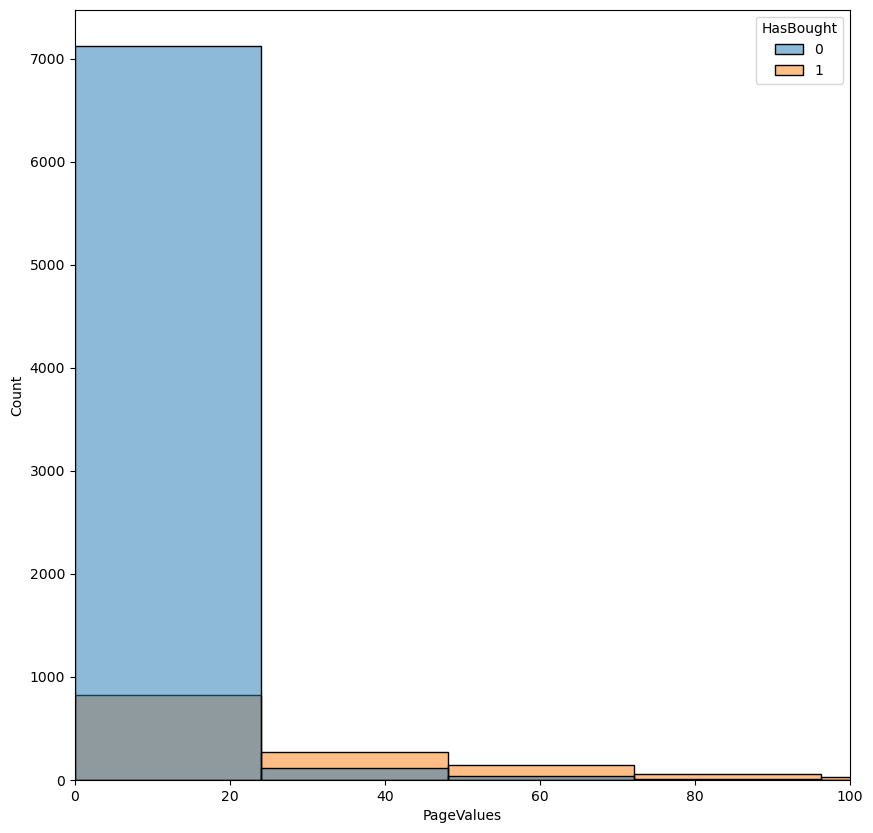

In [19]:
plt.figure(figsize=(10,10))
plt.xlim(0,100)
sns.histplot(x=df['PageValues'],hue=df['HasBought'])

<h2 style="color:red;text-align :center";> Type de visiteurs </h2>  



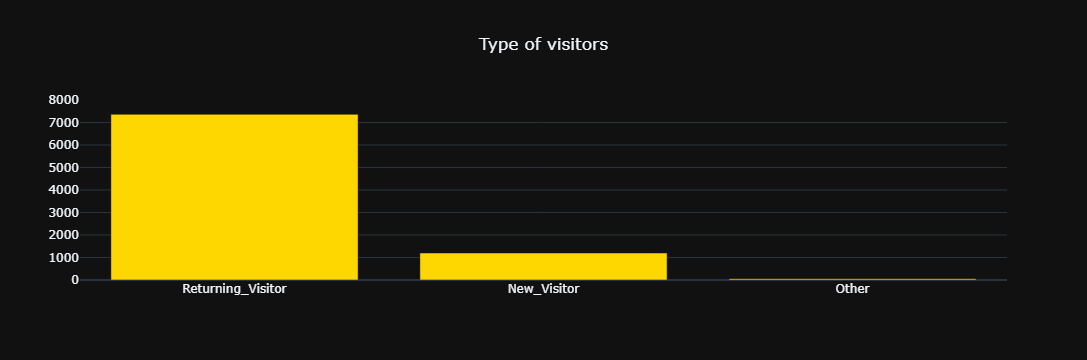

In [20]:
data = go.Bar(x=df['VisitorType'].unique().tolist(),y=df['VisitorType'].value_counts(),marker=dict(color='gold')) 
lay = go.Layout(title='Type of visitors', title_x =0.5, template='plotly_dark' ,yaxis=dict( range= [0,8000] ,dtick=1000 ))
fig = go.Figure(data= data , layout=lay)
pyo.iplot(fig)

Les visiteurs récurrents sont 7 fois plus nombreux que les nouveaux visiteurs, ce qui signifie que le site Web est beaucoup plus susceptible d'être visité après la toute première visite.

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

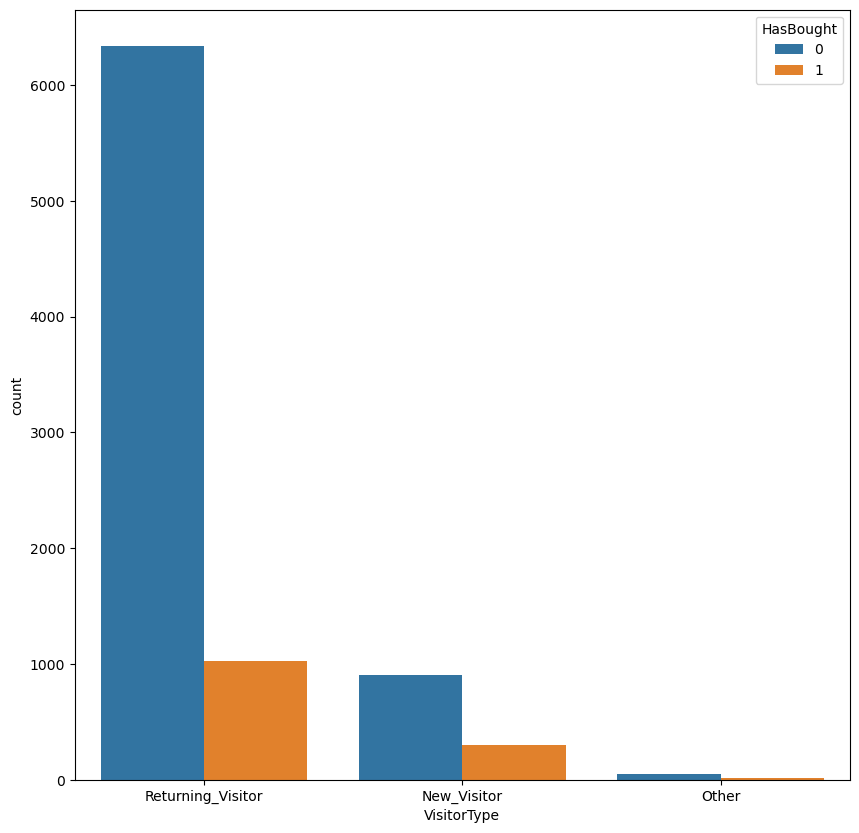

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['VisitorType'],hue=df['HasBought'],)

<p style="color:red";><b>On remarque que les visiteurs  ayant déja visité le site ont un faible taux de conversion 
    (~10%) par rapport aux visiteurs nouveaux (new_visitors) (~25%)</b> </p>

In [22]:
df['TrafficType']= df['TrafficType'].astype('category')
df['VisitorType'] = df['VisitorType'].astype('category')

C:\Users\Xps\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



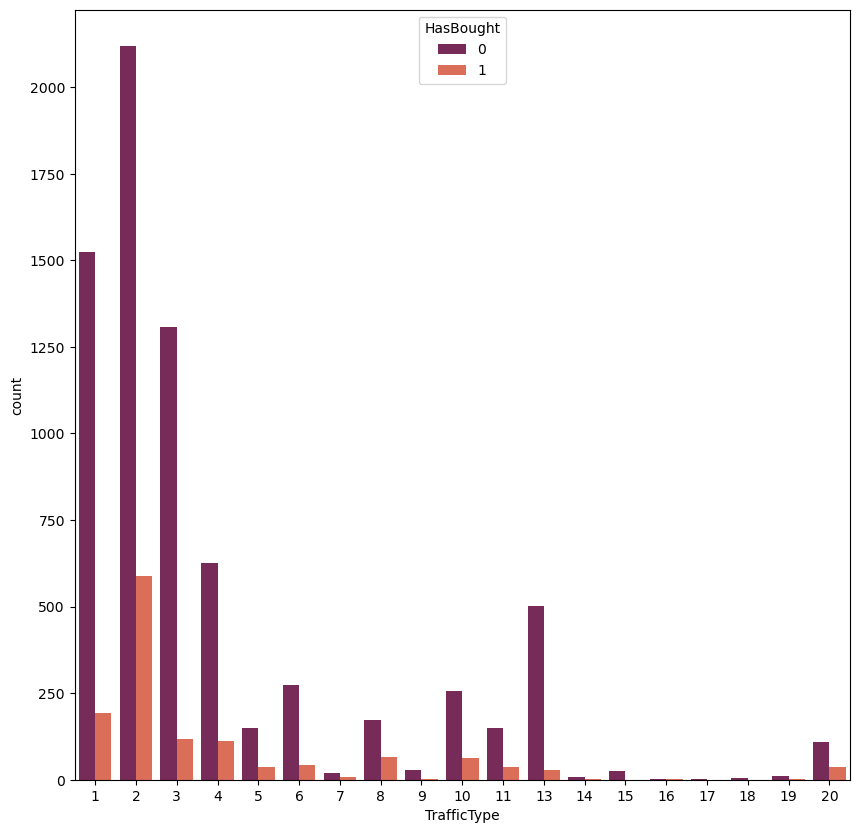

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(df['TrafficType'],hue=df['HasBought'].astype('category'),data= df,palette='rocket');

<p style="color:red";><b>Remarquablement, le type de traffic numero 2 contient le nombre maximale de visiteurs ayant effectué des transactions. Il s'agit du  trafic de référence qui concerne les visiteurs  venant à un site Web à la suite de clics sur des liens sur d'autres sites Web. On peut donc éventuellement essayer de le considérer comme route majeure et unique pour vers le site si c'est possible.</b> </p>

In [24]:
# on retourne au type entier pour la classification
df['TrafficType'] = df['TrafficType'].astype(int)

<p style="color:pink;text-align :center";><b> Est ce que le taux de conversion augmente dans les Weekends ? </b></p>  


In [25]:
weekend = pd.crosstab(df.Weekend,df.HasBought)
weekend['conversion_rate']  = weekend[1]/weekend.sum(axis=1)
weekend = weekend.style.background_gradient(subset='conversion_rate',cmap='RdYlGn')
weekend

Effectivement, en weekend , le taux augmente de presque 4%

<p style="color:red;text-align :center";><b> Qu'en est -il des Special Days (les jours proches des jours fériés (spéciaux) comme Mother's Day par exemple  </b></p>  


In [26]:
sp = pd.crosstab(df['SpecialDay'],df.HasBought)  
sp['conversion_rate'] = sp[1]/sp.sum(axis=1)
sp = sp.style.bar(subset='conversion_rate',color='yellowgreen')
sp

A notre surprise, le nombres des visiteurs effectuant un achat est bien supérieur dans les jours normaux que les jours proches des jours fériées ou les jours fériés-même. 
On constate donc que le taux de conversion n'est pas pas dépendant des jours fériées et que probablement le site web de l'e-commerce n'offre pas des offres particuliers dans les jours spéciaux (black friday , cyber Monday etc ...)

<h3 style="color:blue";><b> Correltion Matrix </b> </h3>  

In [453]:
# On va recoder les attributs catégoriques pour voir leurs corrélations avec la variable output.
df_copy = df 
gg={
   'Returning_Visitor' : 1,'New_Visitor' : 0 ,'Other' : -1 
}

df_copy['VisitorType']=df_copy.VisitorType.apply(lambda x: gg[x])
df_copy['TrafficType'] = df_copy['TrafficType'].astype(int)
df_copy['HasBought'] =df_copy['HasBought'].astype(int)

<AxesSubplot:>

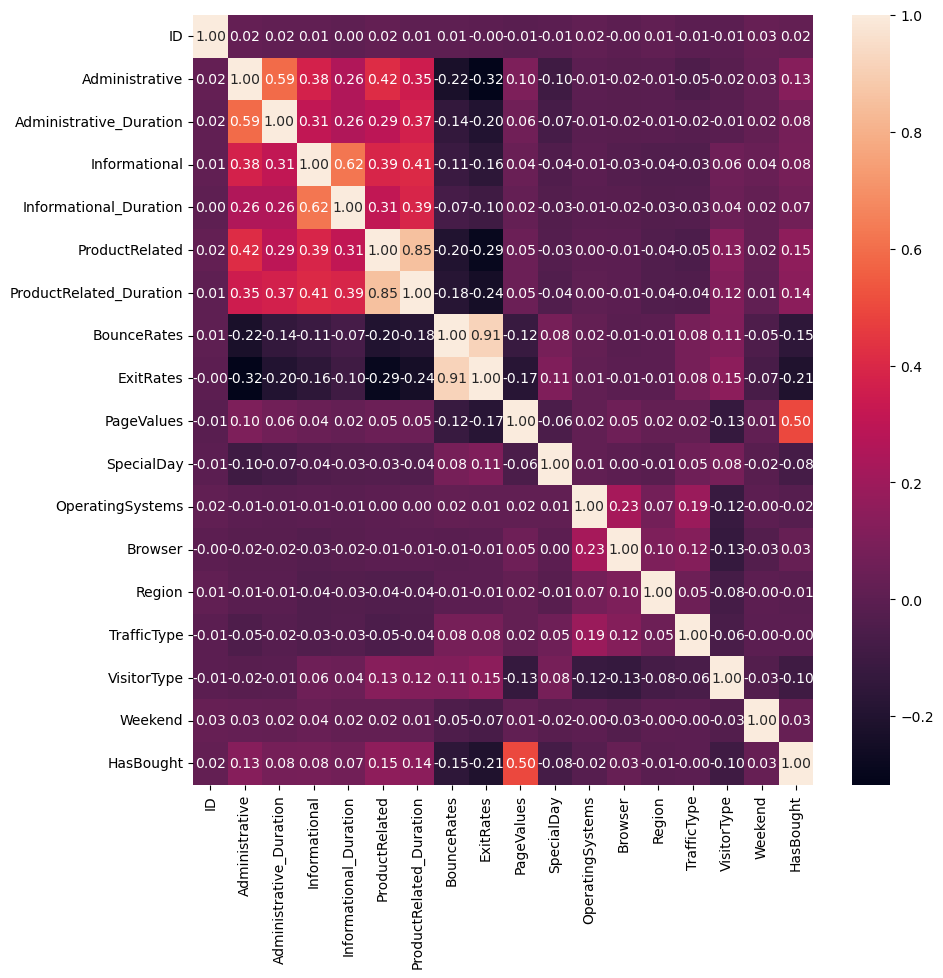

In [460]:
plt.figure(figsize=(10,10))
sns.heatmap(df_copy.corr(),annot=True ,fmt=".2f", cmap="rocket")

On remarque donc que les attributs PageValues et ExitRates ont les plus grandes corrélations avec la variable HasBought en comparaison avec les autres attributs.

<h1  style = 'color:red'; ><b> Data Preprocessing </b> </h1> 

D'apres notre exploratory data analysis , on peut détecter les attributs qui influencent relativement ou fortement notre variable à prédire.<br>
On commence tout d'abord par enlever les colonnes insignificatives dans notre dataset.

<h3 style = 'color:yellow'; > <b> I- Quelles sont les tâches/problèmes qu'on peut détecter d'après notre analyse exploratoire ? </b></h3>

* Supprimer les attributs insignificatif pour notre modèle.
* On doit procéder à générer des attributs (feature engineering) qui vont simplifier et optimiser le modèle.
* Encoder les variables nominales et catégoriques.
* Normaliser les variables continues.
* Palier au problèmes des données désequilibrées en utilisant les techniques classiques d'undersampling/oversampling.
* Il y a pas assez de valeurs abhérantes dans presque tous les attributs, on doit donc penser à utiliser une normalisation insensible aux outliers.


In [312]:
# On regroupe les colonnes des pages Administratives et les pages informationnelles en une seule colonnes qu'on nomme 'nonProductPages'
df['Administrative'] = df['Administrative'] +  df['Informational']
df.rename(columns={'Administrative' : 'nonProductRelated'},inplace=True)

#On regroupe les durées passées dans les pages Administratives et infomationnelles également
df['Administrative_Duration']  = df['Administrative_Duration']  + df['Informational_Duration']
df.rename(columns={'Administrative_Duration' :  'nonProductRelated_Duration'},inplace=True)

#On supprime les colonnes dont nous avons pas besoin 
df.drop(['ID','Informational','Informational_Duration','OperatingSystems','Browser','Region'],axis=1,inplace=True)

# Comme on a besoin de données numériques pour alimenter les algos ML, on changer le type de données des attributs.
df['HasBought'] = df['HasBought'].astype(int) 

# On va supprimer les lignes qui contiennent 'Others' dans la colonne 'VisitorType' , il y en a 13.
df.drop(df[df['VisitorType']=='Others'].index.tolist(),axis=0,inplace=True)

## Encoder l'attribut 'VisitorType' , recodage binaire (2 catégories).
df['VisitorType'] = np.where(df['VisitorType'] =='Returning_Visitor',1,0)

* Synthétiser les données de la classe 1 pour avoir des données équilibrées

                    *******   Synthetic Minority Oversampling Technique    *******

D'après l'exploration des différentes techniques qui permettent de palier à ce problème (undersampling , oversampling , ensemble sampling), on a opté pour la technique smote oversampling qui semble la plus rentable dans la plupart des cas.

In [313]:
X = df.drop('HasBought',axis=1) 
y = df['HasBought'] 

## Données désequilibrées 

In [314]:
df.HasBought.value_counts()

0    7287
1    1335
Name: HasBought, dtype: int64

In [315]:
#splitting the train and test sets.
X_train,X_test, y_train, y_test  =  train_test_split(X,y,test_size=0.3,random_state=69,stratify=y)  

In [316]:
#OverSampling
smote = SMOTE(random_state=1)
X_train, y_train = smote.fit_resample(X_train,y_train)

### Données équilibrées après l'application de la technique SMOTE

In [34]:
y_train.value_counts()

0    5101
1    5101
Name: HasBought, dtype: int64

<h1 style='color : blue ;text-align:center';>  SUPERVISED LEARNING  </h1>

<h1 style='color : red ;text-align:center';> KNN  </h1>

In [398]:
# nombres de découpes dans la méthode GridSearchCV 
découpes = StratifiedKFold(n_splits=5,shuffle=True,random_state =0) 

# construction du modèle
model = Pipeline(steps = [['scaler', RobustScaler()],
                          ['classifier', KNeighborsClassifier()]])

params =  {
          'classifier__metric' : ['euclidean','manhattan','minkowski'] , 
          'classifier__n_neighbors' : np.arange(6,15),
           'classifier__weights' :  ['uniform','distance']
}

# GridSearch  -> parametres optimales.
grid = GridSearchCV(estimator = model, 
                   param_grid=params, 
                   cv = découpes , 
                   scoring = 'roc_auc') 
grid.fit(X_train,y_train)   
knn  = grid.best_estimator_ 

In [399]:
grid.best_params_

{'classifier__metric': 'manhattan',
 'classifier__n_neighbors': 9,
 'classifier__weights': 'distance'}

In [400]:
gg =  knn.predict(X_test)
print(roc_auc_score(y_test,gg))

0.7760373768232667


##### 

<h1 style='color : red ;text-align:center';> NAIVE BAYES  </h1>

L'Algorithme Naive Bayes n'a pas de paramètres qui méritent un GridSearchCV

In [402]:
## Les parameters qu'on peut jouer avec dans un "naive" bayes :/ 
model=GaussianNB()
model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [403]:
# instancier le scaler.
scaler = RobustScaler()
#normaliser X_train
X_train_scaled=scaler.fit_transform(X_train) 

#instancier le modèle.
naive_bayes= GaussianNB()
naive_bayes.fit(X_train_scaled,y_train) 

#normaliser X_test 
X_test_scaled = scaler.transform(X_test)

yhat = naive_bayes.predict(X_test_scaled)

print(classification_report(y_test,yhat))
print(roc_auc_score(y_test,yhat))


              precision    recall  f1-score   support

           0       0.95      0.53      0.68      2186
           1       0.25      0.84      0.38       401

    accuracy                           0.58      2587
   macro avg       0.60      0.69      0.53      2587
weighted avg       0.84      0.58      0.64      2587

0.6866679367455104


On remarque que l'algorithme NaiveBayes a une performance faible que celle du KNN.

<h1 style='color : red ;text-align:center';>  DECISON  TREES</h1>

In [414]:
# nombres de découpes dans la méthode GridSearchCV 
découpes = StratifiedKFold(n_splits=5,shuffle=True,random_state =11) 

# construction du modèle
pipeline_dt = Pipeline(steps = [['scaler', RobustScaler()],
                          ['classifier', DecisionTreeClassifier()]])


params_dt = { 
              'classifier__ccp_alpha': [0.1, 0.01, 0.001],
              'classifier__criterion' :['gini', 'entropy','log_loss'],
              'classifier__min_samples_leaf' :   np.arange(1,30)
             }
# GridSearch  -> parametres optimales.
grid = GridSearchCV(estimator = pipeline_dt, 
                   param_grid=params_dt, 
                   cv = découpes , 
                   scoring = 'roc_auc') 
grid.fit(X_train,y_train)   

grid.best_params_

C:\Users\Xps\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


435 fits failed out of a total of 1305.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
435 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Xps\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Xps\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Xps\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Xps\anaconda3\lib\site-packages\s

{'classifier__ccp_alpha': 0.001,
 'classifier__criterion': 'entropy',
 'classifier__min_samples_leaf': 29}

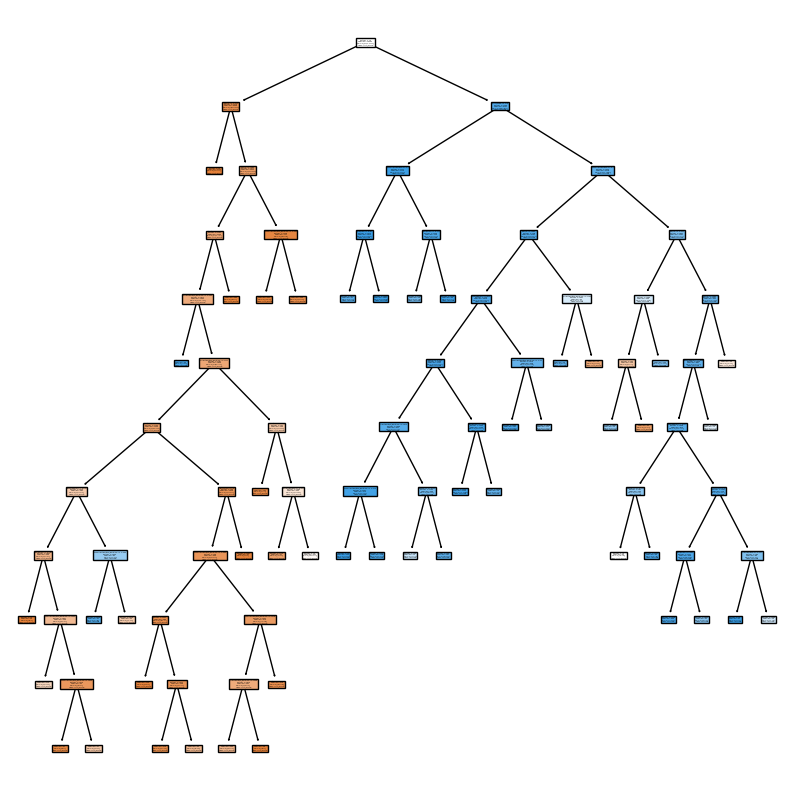

In [415]:
from sklearn.tree import plot_tree,export_graphviz
dt = grid.best_estimator_ 
estimator_dt = dt.named_steps['classifier'] 
fig =  plt.figure(figsize=(10,10))
plot_tree(estimator_dt, filled =True , feature_names= df.drop('HasBought',axis =1).columns.tolist() ,  
            class_names= ["not_buying","buying"])
plt.show() 


In [416]:
yy = dt.predict(X_test)
print(classification_report(y_test,yy))
print(roc_auc_score(y_test,yy))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      2186
           1       0.58      0.75      0.65       401

    accuracy                           0.88      2587
   macro avg       0.77      0.82      0.79      2587
weighted avg       0.89      0.88      0.88      2587

0.8231839203455223


<h1 style='color : red ;text-align:center';> SUPPORT VECTOR MACHINES </h1>

Une première analyse pour effectuer ce modèle serait de voir si les deux classes sont proches à être linéairement séparables.
Comme on a un nombre d'attributs > 3, on peut par exemple prendre uniquement les deux attributs les plus corrélées avec la variable 
target et visualiser la séparation.


In [417]:
import plotly.express as px

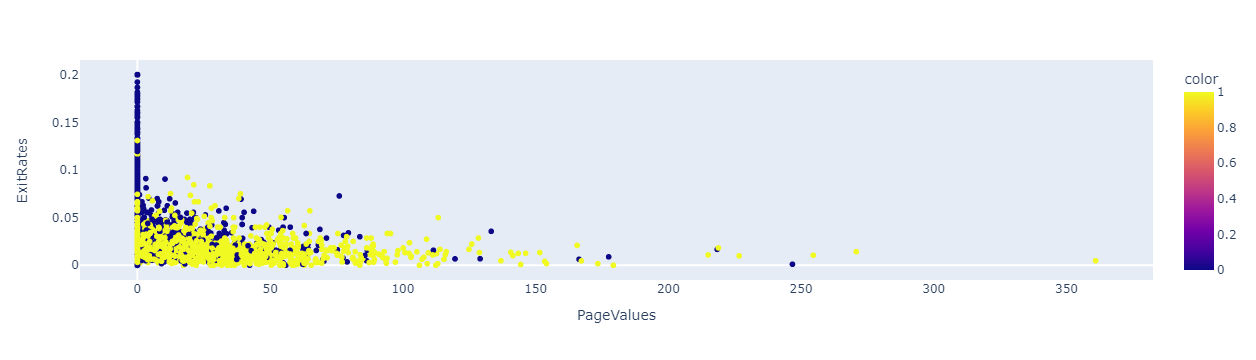

<Figure size 1000x1000 with 0 Axes>

In [472]:
plt.figure(figsize=(10,10))
fig =px.scatter(x=df['PageValues'],y=df['ExitRates'],color=df['HasBought'] ,labels={'x':'PageValues', 'y':'ExitRates'})
fig.update_layout(xaxis=dict(showgrid=False), yaxis=dict(showgrid=False))
fig

On remarque que les classes sont très loin d'être linéairement séparables. ~#Ce ne sera donc pas une tache facile pour notre SVM 😢 

In [421]:
# cette cellule generer beacoup de warnings, du coup fallait cacher les warnings avec ces deux lignes de codes.
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

# nombres de découpes dans la méthode GridSearchCV 
découpes = StratifiedKFold(n_splits=5,shuffle=True,random_state =11) 

# construction du modèle
svm_pipe  = Pipeline(steps = [['scaler', RobustScaler()],
                          ['classifier', svm.SVC()]])


params_svm  = { 
              'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # on a enlevé la valeur 'precomputed' because it only works on squarred matrices.
              'classifier__gamma' :['scale', 'auto'],
              'classifier__degree' : [3,4,5] 
             }
# GridSearch  -> parametres optimales.
grid = GridSearchCV(estimator = svm_pipe, 
                   param_grid=params_svm, 
                   cv = découpes , 
                   scoring = 'roc_auc') 
grid.fit(X_train,y_train)   

grid.best_params_

{'classifier__degree': 3,
 'classifier__gamma': 'auto',
 'classifier__kernel': 'rbf'}

In [422]:
svm = grid.best_estimator_ 
pred = svm.predict(X_test) 
print(classification_report(y_test,pred)) 
print(roc_auc_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2186
           1       0.54      0.72      0.62       401

    accuracy                           0.86      2587
   macro avg       0.74      0.81      0.77      2587
weighted avg       0.88      0.86      0.87      2587

0.805100127083937


<br><br><br>

<h1 style='color : BLUE ;text-align:center';>  UNSUPERVISED LEARNING </h1>

<br><br>

On supprime la variable target qui représente la classe de chaque point de données pour appliquer les algorithmes de clustering, et avoir une idée sur les différents paradigmes avec lequels les algorithmes ont regroupés les données.

In [49]:
# all the features's data
X  = df.drop('HasBought',axis=1)

In [50]:
scaler  = RobustScaler() 
X_scaled = scaler.fit_transform(X) 

<br><br>

<h1 style='color : red ;text-align:center';> K-MEANS CLUSTERING  </h1>

<br> Trouvons le nombre optimale de clusters

In [317]:
from sklearn.metrics import davies_bouldin_score

indices = []
elbow = []
for  k in range(2,10) : 
    kmeans = KMeans(n_clusters=k)
    labels =  kmeans.fit_predict(X_scaled) 
    dunn_index = 1-davies_bouldin_score( X_scaled , labels) 
    indices.append(dunn_index)


In [318]:
data = pd.DataFrame({'k' : range(2,10),'indice_dunn' : indices}) 
data.set_index('k',inplace=True) 
data =  data.style.bar(subset='indice_dunn',color='#ff6700')
data

D'apres l'indice de dunn on voit que K=2 est le nombre optimal de clusters

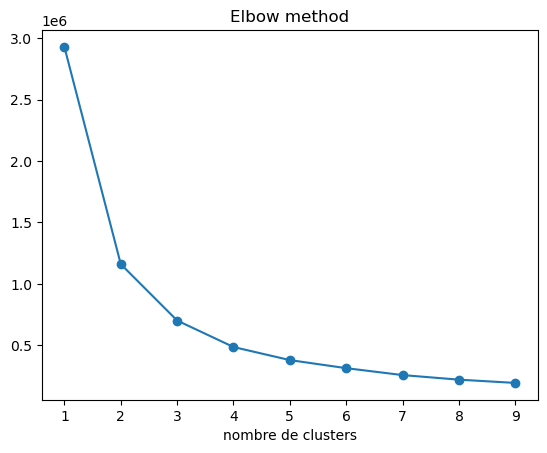

In [221]:
elbow = []
for  k in range(1,10) : 
    kmeans = KMeans(n_clusters=k)
    labels =  kmeans.fit_predict(X_scaled) 
    elbow.append(kmeans.inertia_)
plt.plot(range(1,10), elbow, marker='o')
plt.title('Elbow method')
plt.xlabel('nombre de clusters')
plt.show()

la méthode Elbow confirme l'optimalité de k=2

In [387]:
kmeans_model = KMeans(n_clusters=2)
labels =  kmeans_model.fit_predict(X_scaled) 

print(classification_report(df['HasBought'], labels))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7287
           1       0.78      0.31      0.44      1335

    accuracy                           0.88      8622
   macro avg       0.83      0.65      0.69      8622
weighted avg       0.87      0.88      0.86      8622



In [386]:
cg=pd.DataFrame(labels)
cg[0].value_counts()

1    8091
0     531
Name: 0, dtype: int64

 K-Means ne detecte pas de valeurs aberrantes

<AxesSubplot:>

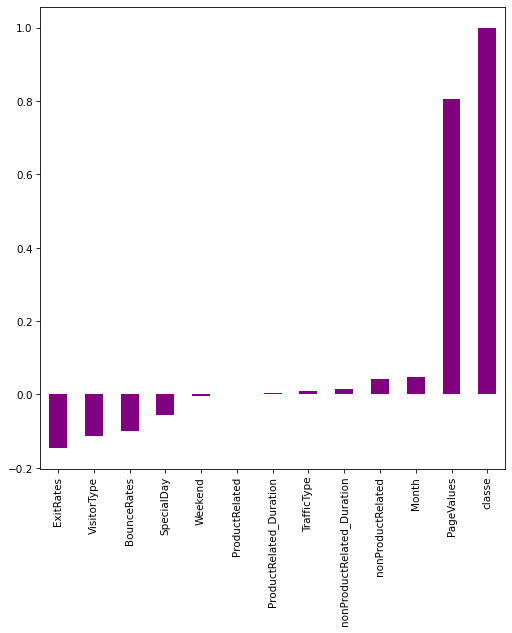

In [364]:
plt.figure(figsize=(8,8),dpi=75)
X.corr()['classe'].iloc[:-1].sort_values(ascending =True).plot(kind='bar',color='purple')

- l'allure affiche les features prises en consideration par le modele KMeans, par exemple classe est le feature le plus utilisé par ce modele pour faire la separation des cluster

In [388]:
#Qualité du K-MEANS CLUSTERING
# print(classification_report(df['HasBought'],X['classe']))
from sklearn.metrics import rand_score

dunn_kmeans = 1-davies_bouldin_score( X_scaled , labels)
rand_kmeans = rand_score(df['HasBought'], labels)
acc_kmeans=accuracy_score(df['HasBought'], labels)
print('dunn index : ', dunn_kmeans , ', rand index : ', rand_kmeans , ', accuracy score : ' , acc_kmeans)

dunn index :  0.5049613975982516 , rand index :  0.787831233529084 , accuracy score :  0.879378334493157


<br><br><br>

<h1 style='color : red ;text-align:center';>  HIERARCHAL AGGLOMERATIVE CLUSTERING  </h1>

<br>

In [324]:
from  sklearn.cluster import AgglomerativeClustering 

On a choisi la distance euclidienne et la distance inter-cluster sera calculée par la technique single-link. 

In [367]:
agg =  AgglomerativeClustering(n_clusters=None,distance_threshold=0,affinity='euclidean',linkage= 'single') 
cluster_labels  = agg.fit_predict(X_scaled) 

In [16]:
matrice_liens = hierarchy.linkage(agg.children_)
linkage_df = pd.DataFrame(matrice_liens,columns =['Cluster1','Cluster2','distance','nombre_datapoints'],index=range(1,matrice_liens.shape[0]+1))
linkage_df.rename_axis('Etape')            

Cluster1  Cluster2    distance  nombre_datapoints
Etape                                                   
1          56.0     103.0    1.414214                2.0
2          96.0     182.0    1.414214                2.0
3        2639.0    3335.0    1.414214                2.0
4        2820.0    6473.0    1.414214                2.0
5         957.0     976.0    1.414214                2.0
...         ...       ...         ...                ...
8616     8171.0   17235.0  743.750630             8614.0
8617     7008.0   17236.0  802.945826             8615.0
8618    17232.0   17237.0  817.469877             8618.0
8619     5580.0   17238.0  921.364206             8619.0
8620    16578.0   17239.0  967.952478             8621.0

[8620 rows x 4 columns]

In [ ]:
linkage_df.tail(5)                         

Cluster1  Cluster2    distance  nombre_datapoints
8616    8171.0   17235.0  743.750630             8614.0
8617    7008.0   17236.0  802.945826             8615.0
8618   17232.0   17237.0  817.469877             8618.0
8619    5580.0   17238.0  921.364206             8619.0
8620   16578.0   17239.0  967.952478             8621.0

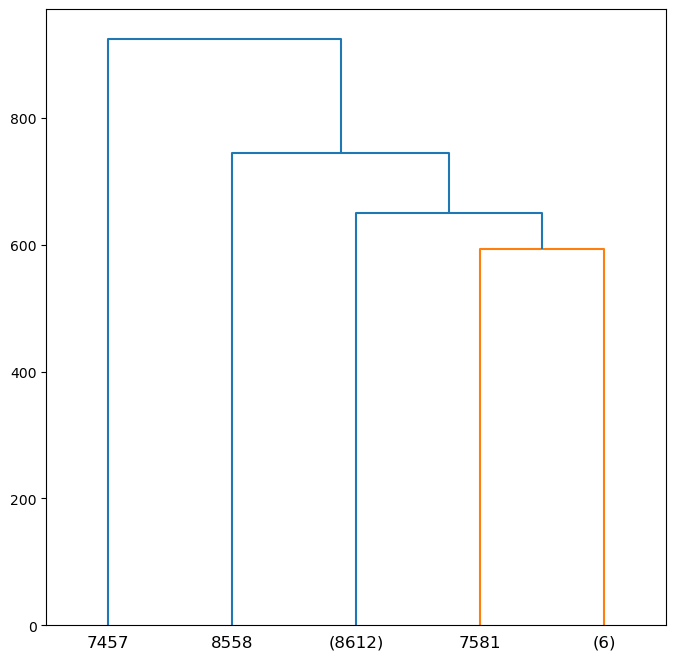

In [229]:
plt.figure(figsize=(8,8))  
dendro = hierarchy.dendrogram(matrice_liens,truncate_mode='lastp',p=5) 

In [370]:
agglomerative_model =  AgglomerativeClustering(n_clusters=2) 
cluster_labels  = agglomerative_model.fit_predict(X_scaled) 

print(classification_report(df['HasBought'], cluster_labels))
print(accuracy_score(df['HasBought'], cluster_labels))


              precision    recall  f1-score   support

           0       0.87      0.99      0.93      7287
           1       0.81      0.20      0.31      1335

    accuracy                           0.87      8622
   macro avg       0.84      0.59      0.62      8622
weighted avg       0.86      0.87      0.83      8622

0.86824402690791


In [371]:
rand_agg = rand_score(df['HasBought'], cluster_labels)
acc_agg = accuracy_score ( df['HasBought'] , cluster_labels)
dunn_agg = 1-davies_bouldin_score(X_scaled , cluster_labels)

In [372]:
pd.DataFrame(labels)[0].unique()

array([1, 0])

<h1 style='color : red ;text-align:center';>  DBSCAN  CLUSTERING  </h1>

<br>

Text(0.5, 0, 'crook of the elbow')

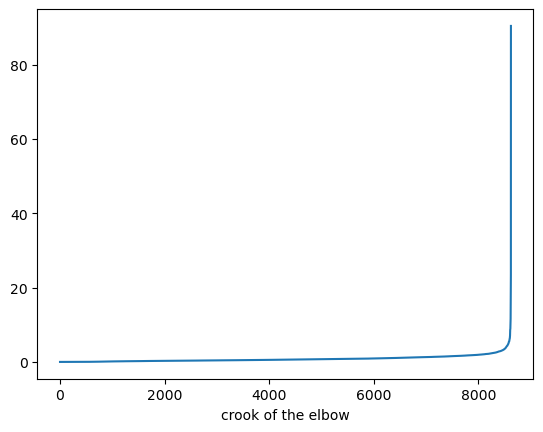

In [373]:
# Import Libraries
from sklearn.cluster import DBSCAN 
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

#  Calculer la distance moyenne entre chaque point des données et ses 32 proches voisins (32 = dim de data * 2 = 16 * 2)
voisins = NearestNeighbors(n_neighbors=32)
voisins_fit = voisins.fit(X_scaled)
distances, indices = voisins_fit.kneighbors(X_scaled)

# ploter le graphe 
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel("crook of the elbow")


- d'apres la methode Crook of the elbow, eps est environ 2,3 ou 4

In [374]:
# apres iterations sur chaque valeur de eps, on a trouvé optimum en eps = 3
dbscan = DBSCAN(eps=3, min_samples=32) 
labels_db = dbscan.fit_predict(X_scaled)

In [375]:
n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)

print("Number of clusters:", n_clusters)

Number of clusters: 2


In [385]:
counting=pd.DataFrame(labels_db)
counting[0].value_counts()

 0    7895
-1     644
 1      83
Name: 0, dtype: int64

le modele DBScan detecte plusieur points aberrantes (644) ce qui va affecter sa precision

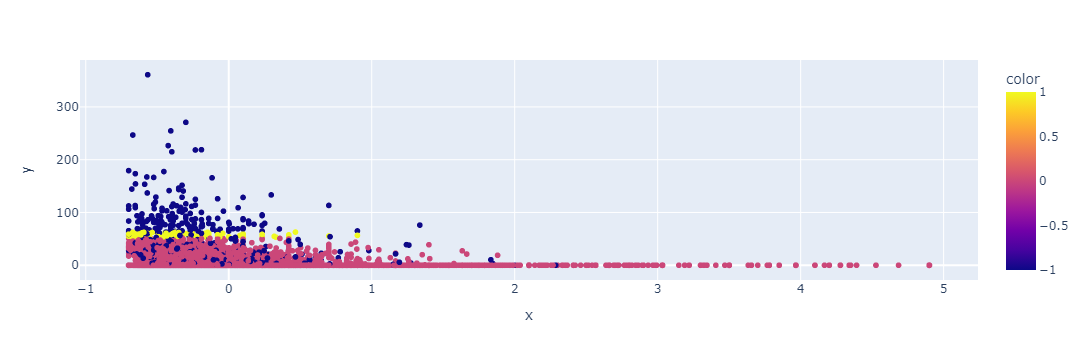

<Figure size 800x800 with 0 Axes>

In [178]:
import plotly.express as px
plt.figure(figsize=(8,8))
px.scatter(x=X_scaled[:,5],y=X_scaled[:,6],color = labels)

In [389]:
# Qualité du modele DBScan

rand_db = rand_score(df['HasBought'], labels_db)
acc_db = accuracy_score(df['HasBought'], labels_db)
dunn_db = 1-davies_bouldin_score(X_scaled , labels_db)

print('dunn index : ', dunn_db , ', rand index : ', rand_db , ', accuracy score : ' , acc_db)

dunn index :  -0.5957614304330245 , rand index :  0.7526597175185525 , accuracy score :  0.8159359777313848


<h1 style='color : red ;text-align:center';>  MLP  CLASSIFIER  </h1>

.

In [134]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from itertools import product

# cette cellule generer beacoup de warnings, du coup fallait cacher les warnings avec ces deux lignes de codes.
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

# nombres de découpes dans la méthode GridSearchCV 
découpes = StratifiedKFold(n_splits=5,shuffle=True,random_state =0) 

# construction du modèle
DL_pipe  = Pipeline(steps = [['scaler', RobustScaler()],
                          ['classifier', MLPClassifier(verbose = False,random_state=3, learning_rate_init=0.001, max_iter = 30)]])


params_DL  = { 
              'classifier__learning_rate_init' : 10.0 ** -np.arange(1, 6),
              'classifier__hidden_layer_sizes' : [x for x in product(range(15,25), range(10,20))] 
             }
# GridSearch  -> parametres optimales.
grid = GridSearchCV(estimator = DL_pipe, 
                   param_grid=params_DL, 
                   cv = découpes , 
                   scoring = 'roc_auc') 
grid.fit(X_train,y_train)   

grid.best_params_

{'classifier__alpha': 0.001,
 'classifier__hidden_layer_sizes': (19, 16),
 'classifier__random_state': 3}

- Apres qu'on a trouvé la combinaision des parametres optimale du modele, on essaye de le construire

In [391]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(19, 16),         # 16 neurones dans chaque couche (19 couches)
                    random_state=3,solver='adam' ,     # ‘adam’ refers to a stochastic gradient-based optimizer
                    learning_rate_init=0.001)         # The initial learning rate used. It controls the step-size in updating the weights
clf.fit(X_train_scaled, y_train)
# clf.predict(X_test)

MLPClassifier(hidden_layer_sizes=(19, 16), random_state=3)

In [392]:
yhat = clf.predict(X_test_scaled)

print(classification_report(y_test,yhat))
print(roc_auc_score(y_test,yhat))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2186
           1       0.53      0.79      0.64       401

    accuracy                           0.86      2587
   macro avg       0.75      0.83      0.78      2587
weighted avg       0.89      0.86      0.87      2587

0.8308859598487769


#                                                      Méthodologie d'évaluation

### Supervisé : 

In [445]:
evaluation =  [{'model':naive_bayes.__class__.__name__,'roc_auc_score':0.686668,'f1_score_0':0.68,'f1_score_1':0.38,'accuracy':0.58},
               {'model':'MLPClassifier','roc_auc_score':0.830885,'f1_score_0':0.91,'f1_score_1':0.64,'accuracy':0.86}
              ] 
models = [knn,dt,svm] 
for model in models :  
    predictions = model.predict(X_test)
    f1_scores =  f1_score(y_test,predictions,labels=[0,1],average=None)  
    evaluation.append({'model':model.named_steps['classifier'].__class__.__name__,'roc_auc_score':roc_auc_score(y_test,predictions),'f1_score_0': f1_scores[0],'f1_score_1':f1_scores[1],'accuracy' : accuracy_score(y_test,predictions) }) 

evaluation = pd.DataFrame(evaluation)
evaluation.sort_values(by='roc_auc_score',ascending=False,inplace =True) 
evaluation

model  roc_auc_score  f1_score_0  f1_score_1  accuracy
1           MLPClassifier       0.830885    0.910000    0.640000  0.860000
3  DecisionTreeClassifier       0.823184    0.925065    0.652126  0.876691
4                     SVC       0.805100    0.915486    0.618337  0.861616
2    KNeighborsClassifier       0.776037    0.893209    0.558093  0.827986
0              GaussianNB       0.686668    0.680000    0.380000  0.580000

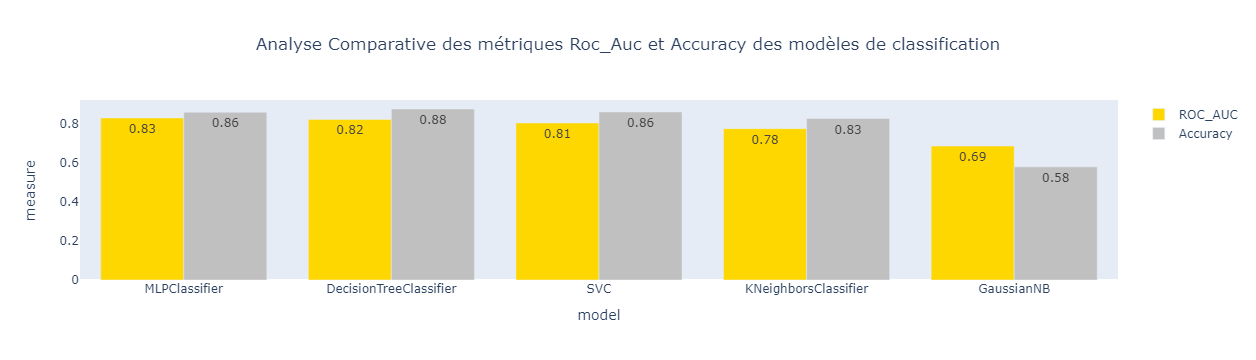

In [467]:
### Comparaison des algorithmes d'apprentissage supervisé.

# Données à afficher dans le diagramme à barres
roc_auc_score = evaluation.roc_auc_score
accuracy = evaluation.accuracy

# Arrondir les valeurs à deux chiffres après la virgule
roc_auc_text = [round(x, 2) for x in roc_auc_score]
accuracy_text = [round(x, 2) for x in accuracy]

# Création du diagramme à barres avec les valeurs de chaque barre
data = [go.Bar(x=evaluation.model, y=roc_auc_score, marker=dict(color='gold'), name='ROC_AUC', text=roc_auc_text),
         go.Bar(x=evaluation.model, y=accuracy, marker=dict(color='silver'), name='Accuracy', text=accuracy_text)]

# Configuration de la figure
lay  = go.Layout(title='Analyse Comparative des métriques Roc_Auc et Accuracy des modèles de classification',
                 title_x =0.5,
                 xaxis=dict(title='model',showgrid=False),
                 yaxis=dict(title='measure',showgrid=False)) 
fig= go.Figure(data = data ,layout=lay) 

# Affichage du diagramme
pyo.iplot(fig)


### Apprentissage non supervisé

In [442]:
unsupervised = [kmeans_model,agglomerative_model,dbscan]
bilan = []
for model in unsupervised  :  
    labels = model.fit_predict(X_scaled)
    bilan.append({'model':model.__class__.__name__, 'rand_score':rand_score(df['HasBought'],labels),'dunn_index':1-davies_bouldin_score(X_scaled , labels), 'accuracy_score' : accuracy_score(df['HasBought'],labels)})
bilan = pd.DataFrame(bilan)
bilan.sort_values('rand_score',ascending = False,inplace=True) 
bilan


model  rand_score  dunn_index  accuracy_score
0                   KMeans    0.787831    0.504961        0.879378
1  AgglomerativeClustering    0.771181    0.553811        0.868244
2                   DBSCAN    0.752660   -0.595761        0.815936

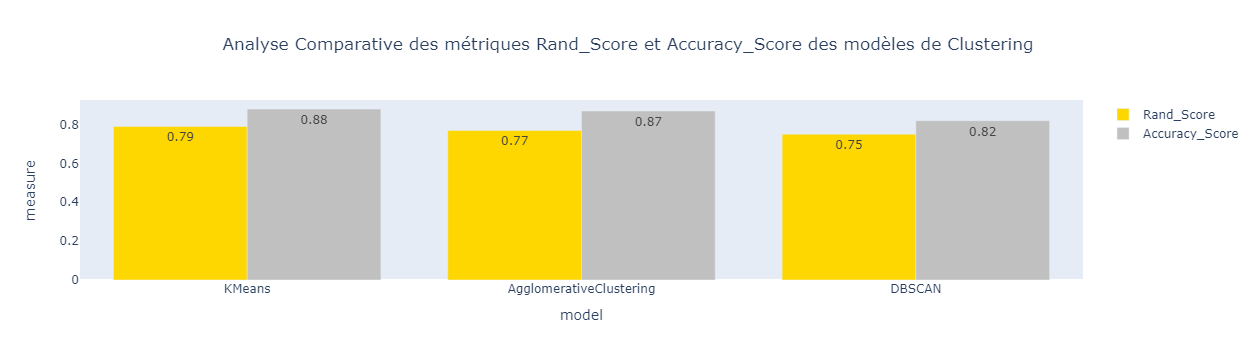

In [471]:
## Comparaison des algorithmes d'apprentissage non supervisé.

# Données à afficher dans le diagramme à barres
rand_score = bilan.rand_score
accuracy_score = bilan.accuracy_score

# Formater les valeurs à deux chiffres après la virgule
rand_score_text = ["{:.2f}".format(x) for x in rand_score]
accuracy_score_text = ["{:.2f}".format(x) for x in accuracy_score]

# Création du diagramme à barres avec les valeurs de chaque barre
data = [go.Bar(x=bilan.model, y=rand_score, marker=dict(color='gold'), name='Rand_Score', text=rand_score_text),
         go.Bar(x=bilan.model, y=accuracy_score, marker=dict(color='silver'), name='Accuracy_Score', text=accuracy_score_text)]

# Configuration de la figure
lay  = go.Layout(title='Analyse Comparative des métriques Rand_Score et Accuracy_Score des modèles de Clustering',
                 title_x =0.5,
                 xaxis=dict(title='model',showgrid=False),
                 yaxis=dict(title='measure',showgrid=False)) 
fig= go.Figure(data = data ,layout=lay) 

# Affichage du diagramme
pyo.iplot(fig)
